# FAKE NEWS PREDICTION

Importing the Dependencies

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

About the Dataset:

1. id: unique id for a news article
2. title: the title of a news article
3. author: author of the news article
4. text: the text of the article; could be incomplete
5. label: a label that marks whether the news article is real or fake:
           1: Fake news
           0: real News





In [91]:
# loading the dataset 
news_dataset = pd.read_csv('train.csv')
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# Data Pre-processing

In [92]:
news_dataset.shape

(20800, 5)

In [93]:
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [94]:
news_dataset = news_dataset.fillna('')
news_dataset.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [95]:
# merging the author name and news title
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']
news_dataset['content']

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object

# Tokenization using Stemming
Stemming: Stemming is the process of reducing a word to its root word.
example:
actor, actress, acting --> act

In [96]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
port_stem = PorterStemmer()

In [97]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [98]:
news_dataset['content'] = news_dataset['content'].apply(stemming)
news_dataset['content']

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object

In [99]:
#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [100]:
X

array(['darrel lucu hous dem aid even see comey letter jason chaffetz tweet',
       'daniel j flynn flynn hillari clinton big woman campu breitbart',
       'consortiumnew com truth might get fire', ...,
       'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time',
       'alex ansari nato russia hold parallel exercis balkan',
       'david swanson keep f aliv'], dtype=object)

In [101]:
Y

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

# Vectorization
Converting the textual data to numerical data

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

# MODEl TRAINING
Using Logistic Regression, Decision Tree Classifier

Splitting the dataset to training & test data

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=20)

Training the Model: 

1)Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(X_train, Y_train)

LogisticRegression()

EVALUATION: Accuracy Score

In [105]:
from sklearn.metrics import accuracy_score

# Accuracy score on the training data
train_preds_lr = model_LR.predict(X_train)
train_acc_lr = accuracy_score(train_preds_lr, Y_train)

# Accuracy score on the test data
test_preds_lr = model_LR.predict(X_test)
test_acc_lr = accuracy_score(test_preds_lr, Y_test)

print("Accuracy score on training data:", train_acc_lr)
print("Accuracy score on test data:", test_acc_lr)


Accuracy score on training data: 0.9873197115384615
Accuracy score on test data: 0.9752403846153846


VISUALISATION: Confusion Matrix

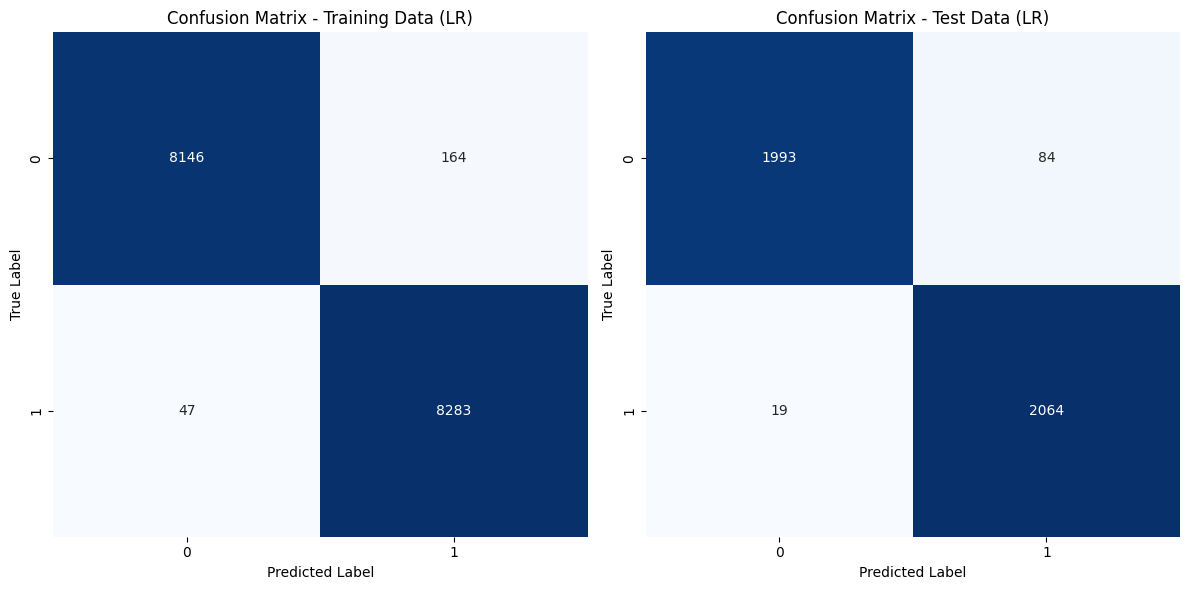

In [106]:
# Confusion matrices
conf_matrix_train_lr = confusion_matrix(Y_train, train_preds_lr)
conf_matrix_test_lr = confusion_matrix(Y_test, test_preds_lr)

# Plotting heatmaps for Logistic Regression
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Training Data (LR)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Test Data (LR)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

2)Decision Tree Classifier

In [107]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

EVALUATION: Accuracy Score

In [108]:
train_preds_dtc = model_dtc.predict(X_train)
test_preds_dtc = model_dtc.predict(X_test)

train_acc_dtc = accuracy_score(train_preds_dtc, Y_train)
test_acc_dtc = accuracy_score(test_preds_dtc, Y_test)

print("Accuracy score on training data (Decision Tree):", train_acc_dtc)
print("Accuracy score on test data (Decision Tree):", test_acc_dtc)

Accuracy score on training data (Decision Tree): 1.0
Accuracy score on test data (Decision Tree): 0.9915865384615384


VISUALISATION: Confusion Matrix

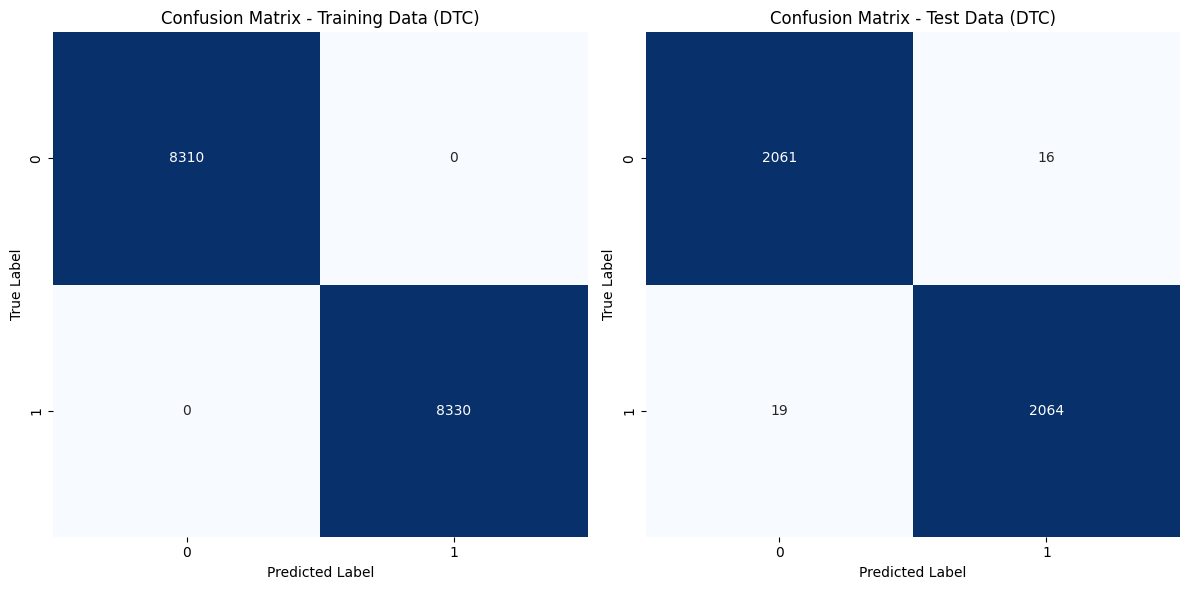

In [109]:
# Confusion matrices
conf_matrix_train_dtc = confusion_matrix(Y_train, train_preds_dtc)
conf_matrix_test_dtc = confusion_matrix(Y_test, test_preds_dtc)

# Plotting heatmaps for Decision Tree Classifier
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train_dtc, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Training Data (DTC)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test_dtc, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Test Data (DTC)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

ACCURACY COMPARISON: Logistic Regression and Decision Tree Classifier

In [110]:
if test_acc_lr > test_acc_dtc:
    final_model = model_lr
    print("Final Model Selected: Logistic Regression")
    print("Test Accuracy:", lr_test_accuracy)
else:
    final_model = model_dtc
    print("Final Model Selected: Decision Tree Classifier")
    print("Test Accuracy:", test_acc_dtc)

Final Model Selected: Decision Tree Classifier
Test Accuracy: 0.9915865384615384


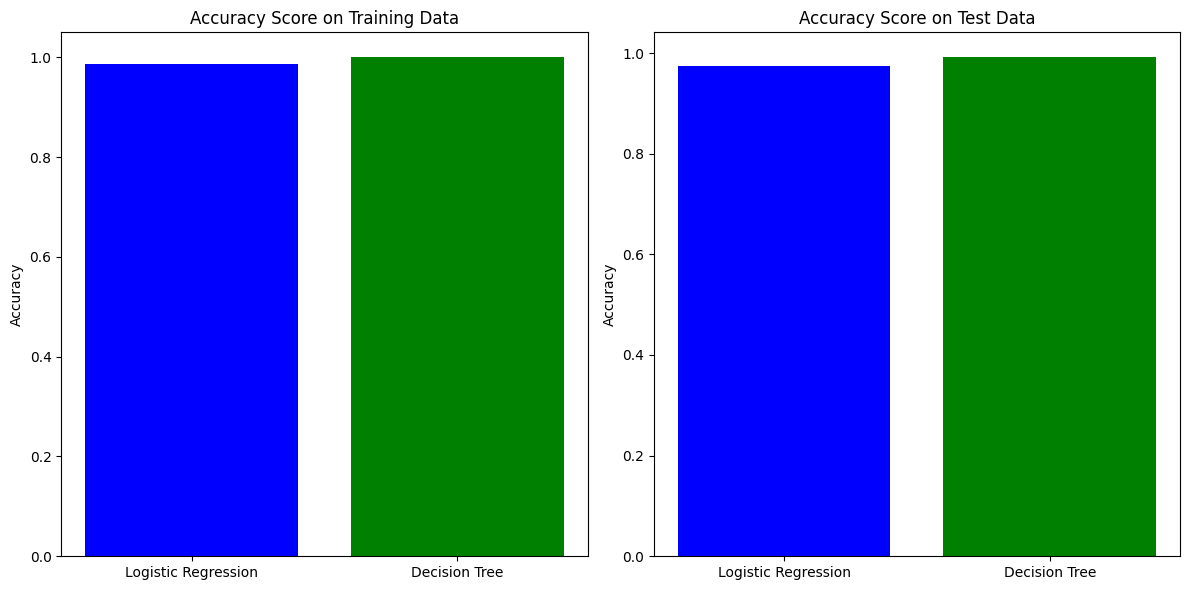

In [111]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot accuracy comparison
axes[0].bar(['Logistic Regression', 'Decision Tree'], [train_acc_lr, train_acc_dtc], color=['blue', 'green'])
axes[0].set_title('Accuracy Score on Training Data')
axes[0].set_ylabel('Accuracy')
axes[1].bar(['Logistic Regression', 'Decision Tree'], [test_acc_lr, test_acc_dtc], color=['blue', 'green'])
axes[1].set_title('Accuracy Score on Test Data')
axes[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

# Testing using new data

In [112]:
test_df = pd.read_csv('test.csv')
solution_df = pd.read_csv('sol.csv')
test_df.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [113]:
merged_df = pd.merge(test_df, solution_df, left_index=True, right_index=True)
merged_df = merged_df.fillna('')
merged_df['content'] = merged_df['author'] + ' ' + merged_df['title']  
merged_df['content'] = merged_df['content'].apply(stemming)  
X_merged = vectorizer.transform(merged_df['content'])

# Make predictions
predictions = model_dtc.predict(X_merged) 
Y_true = merged_df['label'] 
accuracy = accuracy_score(Y_true, predictions)

print("Accuracy:", accuracy)


Accuracy: 0.6365384615384615
